### using pyroma conda env 

In [2]:
import scanpy as sc
import time
from pyROMA.ROMA import *
import os
print(os.getcwd())
print(ROMA)


/home/az/Projects/01_Curie/05_pyROMA/pyROMA_shared
<class 'pyROMA.ROMA.ROMA'>


In [3]:
# Initialize ROMA
roma = ROMA()
# this should be empty at first
roma.adata

In [2]:
roma

scROMA

### Load the dataset, normalized rna expression matrix

In [3]:
import pandas as pd

df = pd.read_csv('datasets/from_R/rheman-il17-tnf-rna-exp-matrix-norm.tsv', sep='\t')
print(df.shape)
df.head()

(19086, 12)


,control 1,control 2,control 3,control 4,control 5,control 6,IL-17+TNFa 1,IL-17+TNFa 2,IL-17+TNFa 3,IL-17+TNFa 4,IL-17+TNFa 5,IL-17+TNFa 6
A1BG,0.278475,-1.075932,-0.428281,-0.147953,-0.128834,-0.284462,0.379706,-0.414877,-0.442843,-0.548127,-0.402266,-1.104498
A1CF,-3.154006,-3.154006,-3.154006,-3.154006,-3.154006,-3.154006,-3.154006,-3.154006,-3.154006,-3.154006,-3.154006,-3.154006
A2M,-3.154006,0.464057,-0.178983,-0.844707,0.174403,0.397409,-0.202887,0.033370,-3.154006,-2.141420,-0.747615,0.287938
A2ML1,2.955758,0.464057,2.682657,1.549612,1.947130,0.317617,2.835252,3.817322,3.579638,3.830860,3.556292,2.231957
A3GALT2,-3.154006,-3.154006,-3.154006,-2.243884,-2.188973,-3.154006,-2.587470,-2.662947,-3.154006,-2.560640,-3.154006,-2.230254


#### Additional metdata

In [4]:
sample_labels = pd.read_csv('datasets/from_R/rheman-il17-tnf-rna-exp-matrix-norm-sample_labels.tsv', sep='\t')
print(sample_labels.shape)
sample_labels.head()

(12, 5)


,Sample_id,Batch,CF_State,Treatment,Simple_id
1,GSM5356205,1,non-CF,control,control 1
2,GSM5356206,1,non-CF,control,control 2
3,GSM5356207,1,non-CF,control,control 3
4,GSM5356208,2,non-CF,control,control 4
5,GSM5356209,2,non-CF,control,control 5


In [5]:
sample_labels.tail()

,Sample_id,Batch,CF_State,Treatment,Simple_id
8,GSM5356212,1,non-CF,IL-17+TNFa,IL-17+TNFa 2
9,GSM5356213,1,non-CF,IL-17+TNFa,IL-17+TNFa 3
10,GSM5356214,2,non-CF,IL-17+TNFa,IL-17+TNFa 4
11,GSM5356215,2,non-CF,IL-17+TNFa,IL-17+TNFa 5
12,GSM5356216,2,non-CF,IL-17+TNFa,IL-17+TNFa 6


### Convert into adata object

In [6]:
import anndata
adata = anndata.AnnData(df.T)
adata

AnnData object with n_obs × n_vars = 12 × 19086

In [8]:
# Genes are in the adata.var
adata.var

""
A1BG
A1CF
A2M
A2ML1
A3GALT2
...
ZYG11A
ZYG11B
ZYX
ZZEF1


In [9]:
roma.adata = adata
print(roma.adata)

AnnData object with n_obs × n_vars = 12 × 19086


### optional steps  if data is not normalized or needs further filtering 

In [10]:
# Download and preprocess adata
#adata = sc.read_h5ad('datasets/rna_10xpmbc3k.h5ad')
#sc.pp.filter_cells(adata, min_genes = 200)
#sc.pp.filter_genes(adata, min_cells = 3)

#sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)

#sc.pp.highly_variable_genes(adata, n_top_genes=5000)#, flavor='seurat_v3')
#adata = adata[:, adata.var.highly_variable]
#adata = adata[adata.obs['celltype'] == 'B']
#adata.X = adata.X.todense()


### Initialize the pathways .gmt file

In [11]:
# We use MSigDB Hallmark 2023 file, which is stored in the genesets folder
roma.gmt ='h.all.v2023.1.Hs.symbols'

In [12]:
# This function allows to load the patwhays into dictionary
pathways = roma.read_gmt_to_dict('h.all.v2023.1.Hs.symbols')

In [13]:
query = ['pical', 'surface', 'fatty', 'acid metabolism', 'oagulation', 'IL-17', 'IL', 'interleukin-17', 'TNF', 'ilium', 'emostasis'] 
query_upper = [x.upper() for x in query]
print(query_upper)
for k, v in pathways.items():
    for x in query_upper:
        if x in k:
            print(k)

['PICAL', 'SURFACE', 'FATTY', 'ACID METABOLISM', 'OAGULATION', 'IL-17', 'IL', 'INTERLEUKIN-17', 'TNF', 'ILIUM', 'EMOSTASIS']
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_APICAL_JUNCTION
HALLMARK_APICAL_SURFACE
HALLMARK_APICAL_SURFACE
HALLMARK_FATTY_ACID_METABOLISM
HALLMARK_COAGULATION
HALLMARK_IL2_STAT5_SIGNALING
HALLMARK_BILE_ACID_METABOLISM


In [14]:
# This variable specifies Which pathways to check
# alternatively: pathways_to_check = 'all' will check all the pathways in the reactome .gmt file 

pathways_to_check = 'all'

# pathways_to_check = ['HALLMARK_TNFA_SIGNALING_VIA_NFKB',
#     'HALLMARK_IL6_JAK_STAT3_SIGNALING',
#     'HALLMARK_APICAL_JUNCTION',
#     'HALLMARK_APICAL_SURFACE',
#     'HALLMARK_APICAL_SURFACE',
#     'HALLMARK_COAGULATION',
#     'HALLMARK_IL2_STAT5_SIGNALING',
#     'HALLMARK_BILE_ACID_METABOLISM']


In [15]:
roma

scROMA

In [16]:
# Filter pathways that have less genes than min_n_number
roma.min_n_genes

10

In [17]:
# Granularity of the null geneset size, from 0 to 100, less is more precise
roma.approx_int = 1

### Run the ROMA analysis

In [ ]:
# Set the number of iterations to create the null distribution
iters = 1000

In [18]:

start = time.time()
roma.compute(pathways_to_check, parallel=True, incremental=False, iters=iters)
end = time.time()
minutes, seconds = divmod(end - start, 60)
print(f"Truncated Parallel {iters} iterations, running time (min): " + "{:0>2}:{:05.2f}".format(int(minutes),seconds))

adata

Processing gene set: HALLMARK_NOTCH_SIGNALING | len of subsetlist:  32 


Processing gene set: HALLMARK_HEDGEHOG_SIGNALING | len of subsetlist:  36 
Processing gene set: HALLMARK_ANGIOGENESIS | len of subsetlist:  36 
took null distribution from previous calculation
Processing gene set: HALLMARK_PANCREAS_BETA_CELLS | len of subsetlist:  39 
Processing gene set: HALLMARK_WNT_BETA_CATENIN_SIGNALING | len of subsetlist:  42 
Processing gene set: HALLMARK_APICAL_SURFACE | len of subsetlist:  44 
Processing gene set: HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY | len of subsetlist:  49 
Processing gene set: HALLMARK_TGF_BETA_SIGNALING | len of subsetlist:  54 
Processing gene set: HALLMARK_MYC_TARGETS_V2 | len of subsetlist:  57 
Processing gene set: HALLMARK_CHOLESTEROL_HOMEOSTASIS | len of subsetlist:  74 
Processing gene set: HALLMARK_IL6_JAK_STAT3_SIGNALING | len of subsetlist:  87 
Processing gene set: HALLMARK_PROTEIN_SECRETION | len of subsetlist:  96 
Processing gene set: HALLMARK_INTERFERON_ALPHA_RESPONSE | len of subsetlist:  97 
took null distribution from

AnnData object with n_obs × n_vars = 12 × 19086
    uns: 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

### After the computation is done, roma updates its status

In [19]:
roma

scROMA: module activities are computed

### In the roma.adata object we could see new entities  

In [20]:
roma.adata

AnnData object with n_obs × n_vars = 12 × 19086
    uns: 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

### The ROMA_stats table shows all the computed pathways with their L1 scores and p-values, as well as Median_Expression with corresponding q_values
p and q values are already adjusted using Benjamini-Hochberg FDR procedure

In [21]:
roma.adata.uns['ROMA_stats']

,L1,p_value,Median_Exp,q_value
HALLMARK_NOTCH_SIGNALING,0.354135,0.666667,4.008739e-01,0.030525
HALLMARK_HEDGEHOG_SIGNALING,0.363446,0.378788,7.227873e-02,0.518599
HALLMARK_ANGIOGENESIS,0.445277,0.378788,-6.986683e-02,0.999001
HALLMARK_PANCREAS_BETA_CELLS,0.384580,0.666667,2.642240e-01,0.118631
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.367879,0.666667,1.201829e-01,0.399600
HALLMARK_APICAL_SURFACE,0.439403,0.378788,3.442252e-02,0.608366
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,0.584750,0.378788,1.494641e-01,0.304868
HALLMARK_TGF_BETA_SIGNALING,0.305706,0.666667,3.151394e-01,0.036805
HALLMARK_MYC_TARGETS_V2,0.322228,0.666667,2.617394e-01,0.091213
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.286944,0.666667,3.671050e-01,0.009366


### We could further filter out which pathways would be considered significantly active

In [25]:
# took a higher treshold
roma.select_active_modules(p_threshold=0.05, q_threshold=0.05)

### Significantly active patwhays are stored in ROMA_active_modules

In [26]:
roma.adata.uns['ROMA_active_modules']

,L1,p_value,Median_Exp,q_value
HALLMARK_NOTCH_SIGNALING,0.354135,0.666667,0.400874,0.030525
HALLMARK_TGF_BETA_SIGNALING,0.305706,0.666667,0.315139,0.036805
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.286944,0.666667,0.367105,0.009366
HALLMARK_IL6_JAK_STAT3_SIGNALING,0.577897,0.378788,0.590369,0.004163
HALLMARK_INTERFERON_ALPHA_RESPONSE,0.453564,0.378788,0.436475,0.004163
HALLMARK_PEROXISOME,0.432880,0.378788,0.238161,0.047453
HALLMARK_BILE_ACID_METABOLISM,0.319985,0.378788,0.449138,0.004163
HALLMARK_UNFOLDED_PROTEIN_RESPONSE,0.551258,0.378788,0.300422,0.006660
HALLMARK_SPERMATOGENESIS,0.241979,0.378788,0.349653,0.004163
HALLMARK_UV_RESPONSE_DN,0.329448,0.378788,0.326405,0.004163


### In ROMA entity, if we query the pathway name we could retrieve addition information

In [ ]:
roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].q_value

0.1554001554001554

### e.g. outlier genes (in this pathway there were none) 

In [ ]:
roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].outliers

[]

### or we could have a look at the null distribution of median expression values

In [ ]:
roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].null_median_exp.shape

(1000,)

### and create a plot, where red line would indicate our test median expression against the histogram of null distribution (in blue)

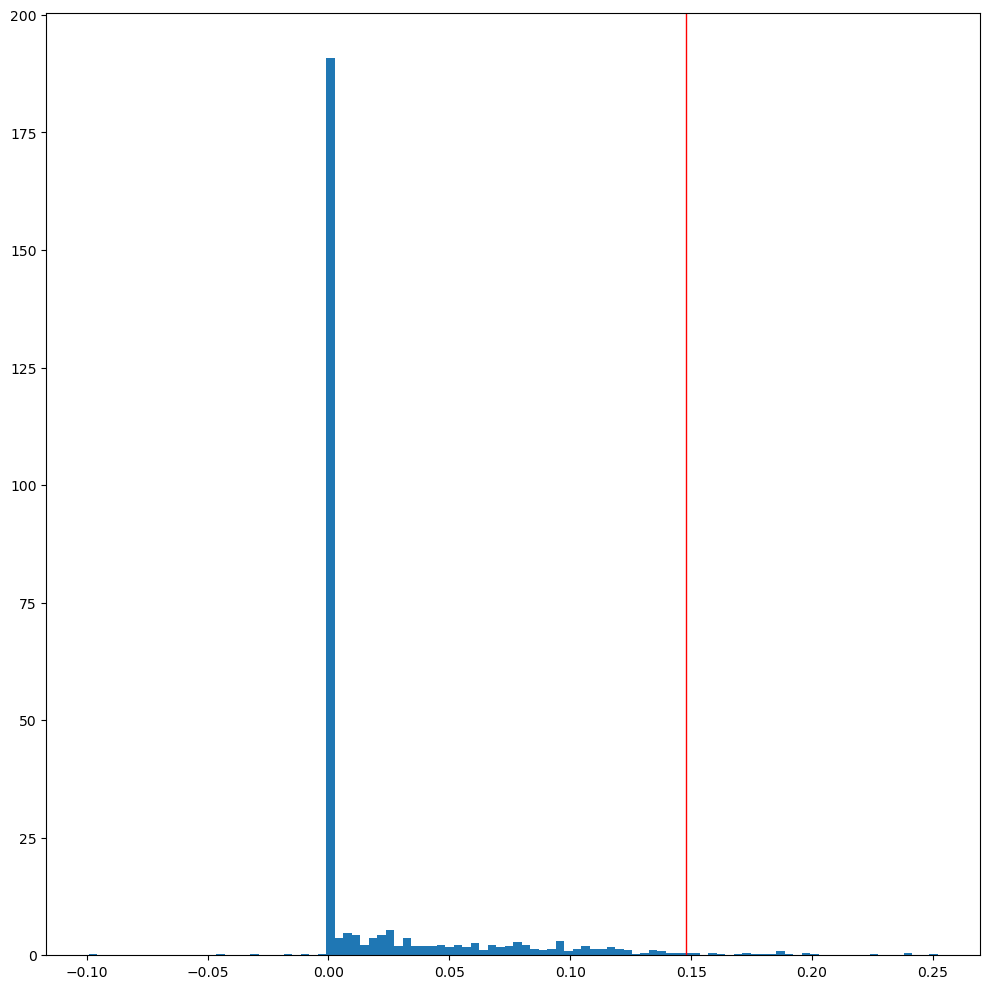

In [ ]:
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(1, 1, figsize=(7.5, 7.5), tight_layout=True)
x = roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].null_median_exp
axs.hist(x, density=True, bins=100)
axs.axvline(roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].test_median_exp, color='r', linewidth=1)

plt.show()

### Loop over all the active modules

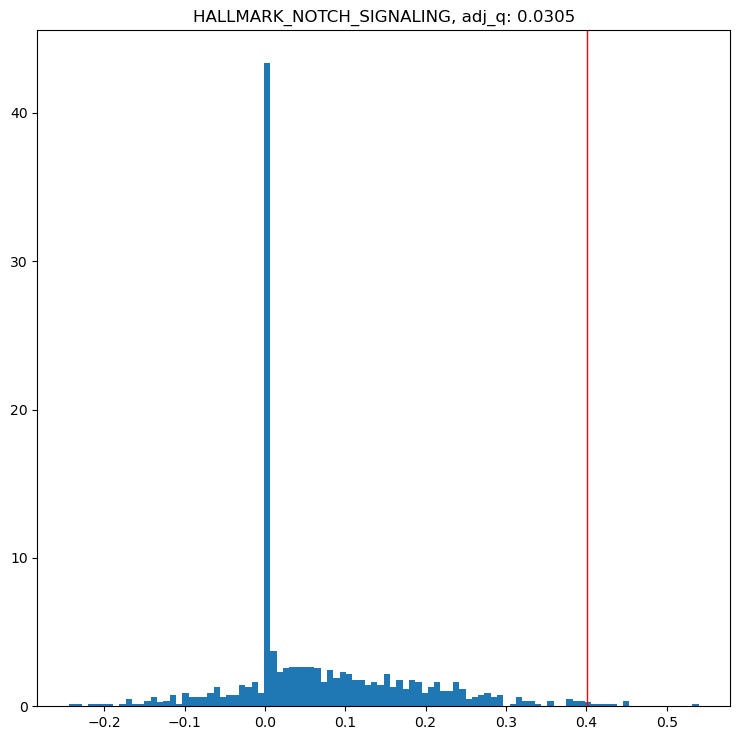

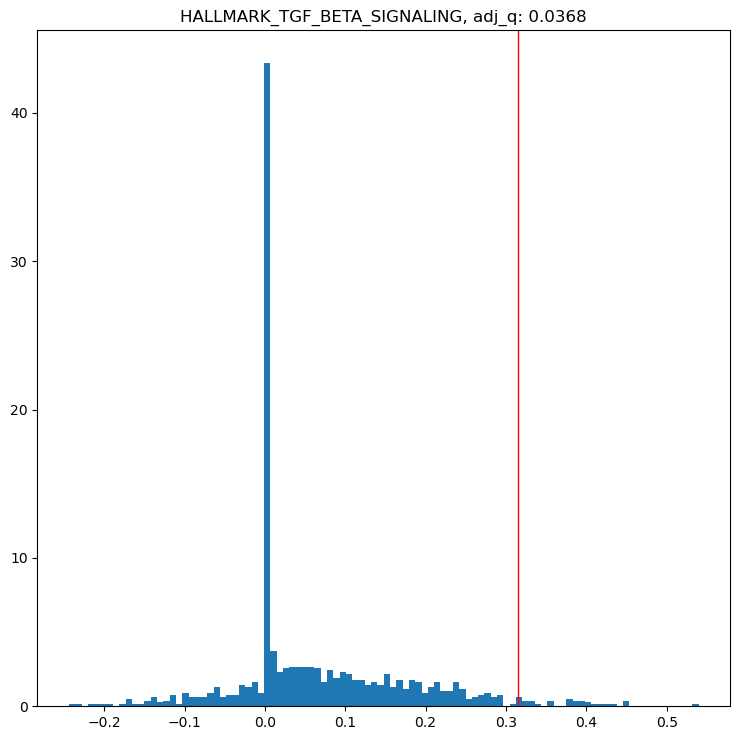

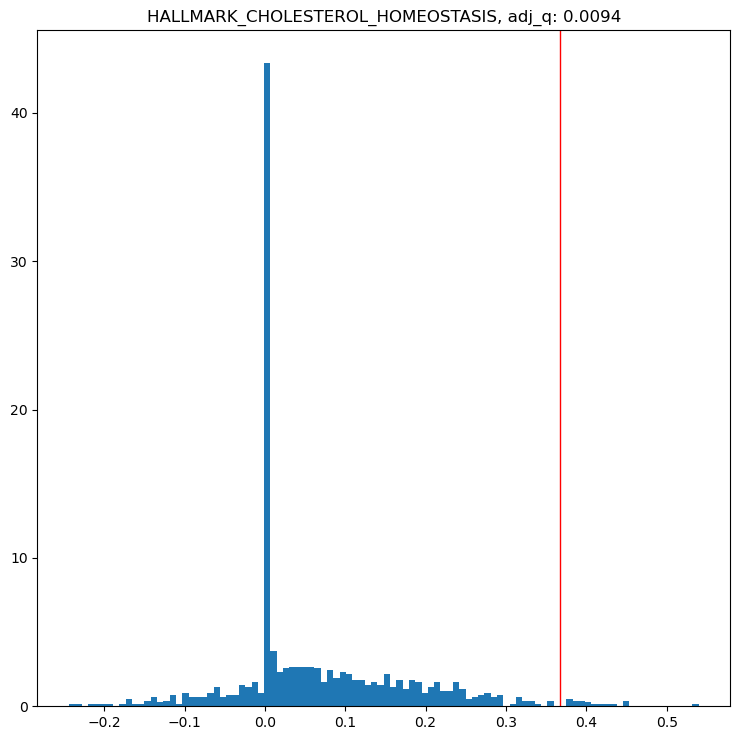

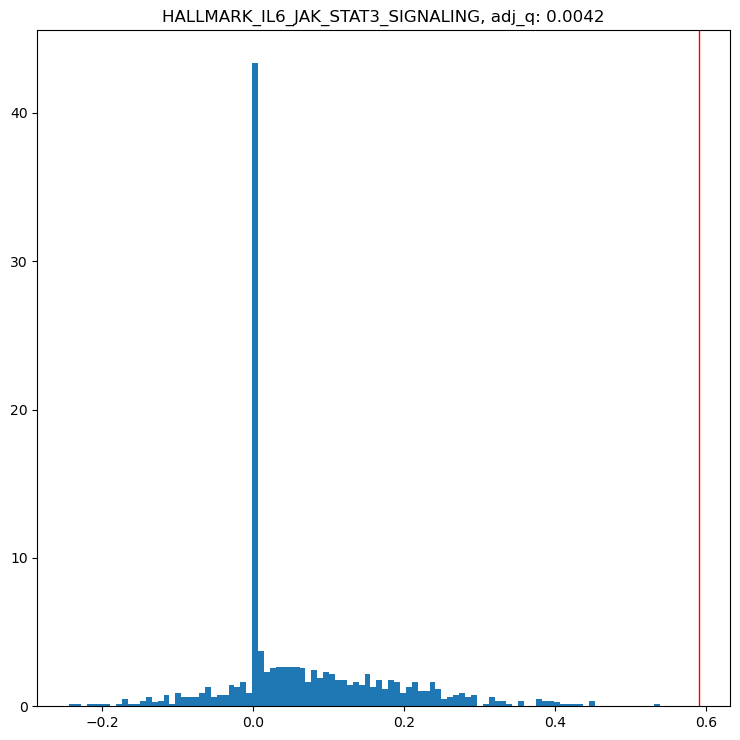

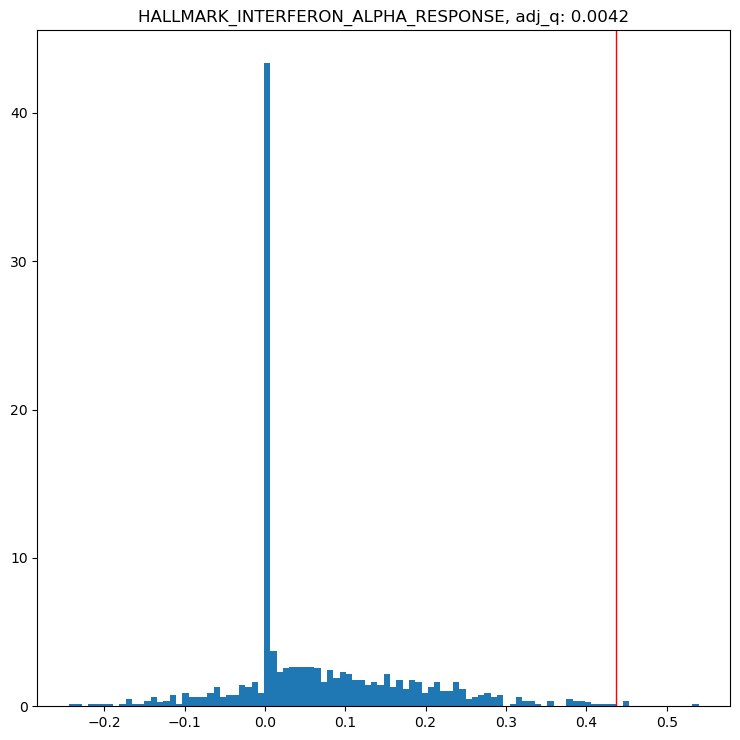

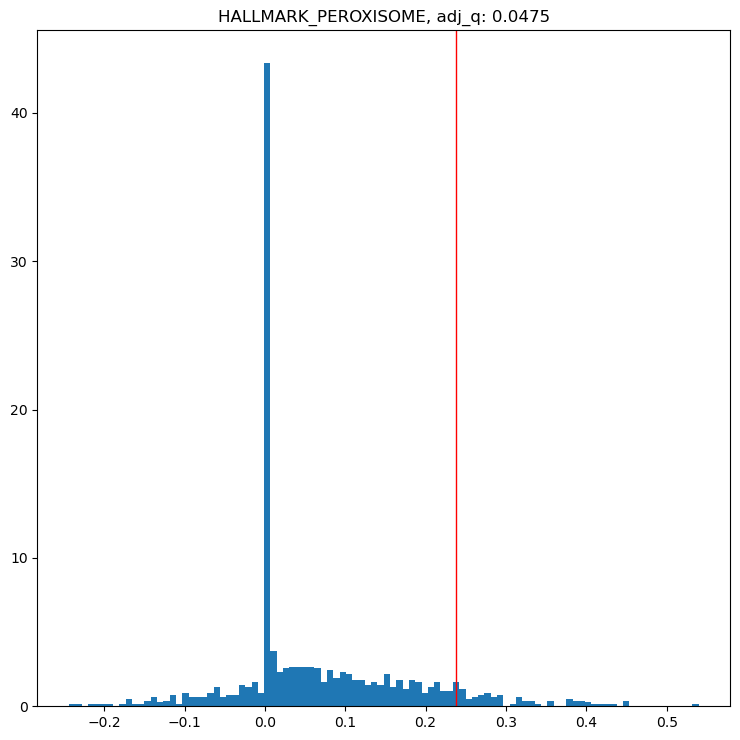

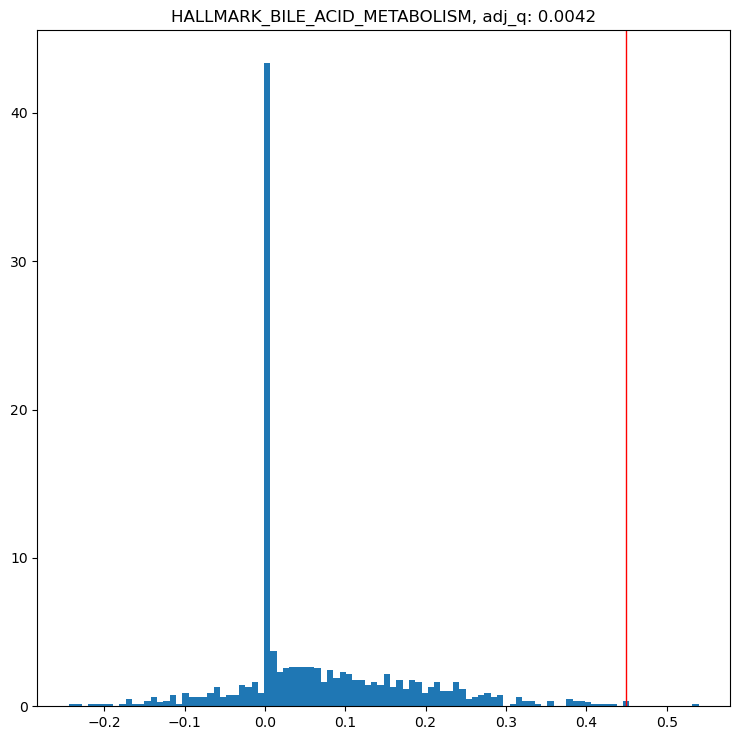

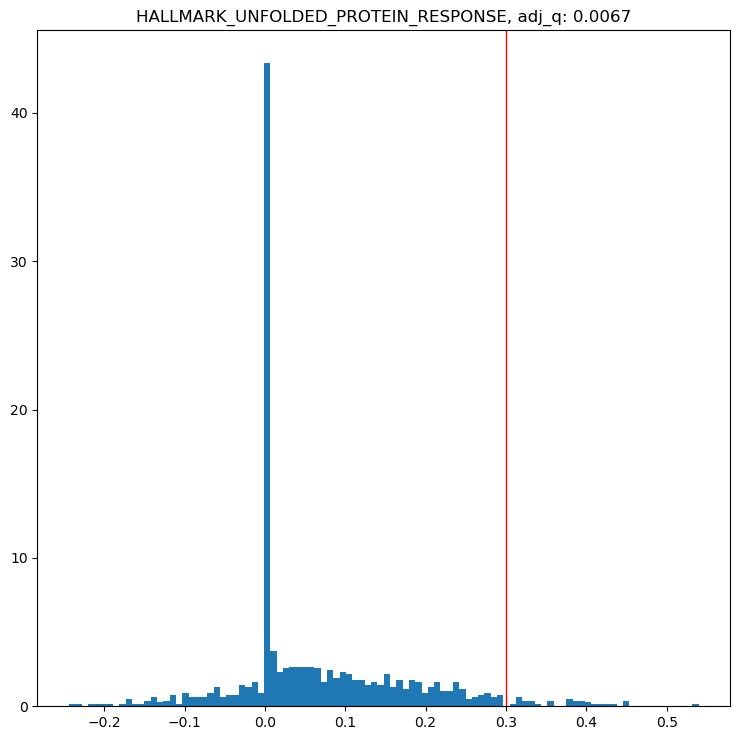

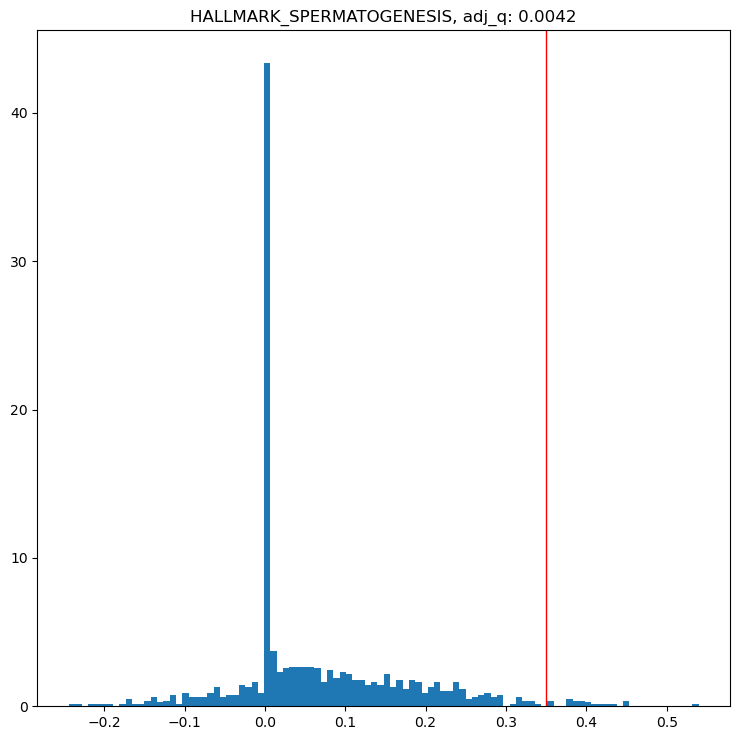

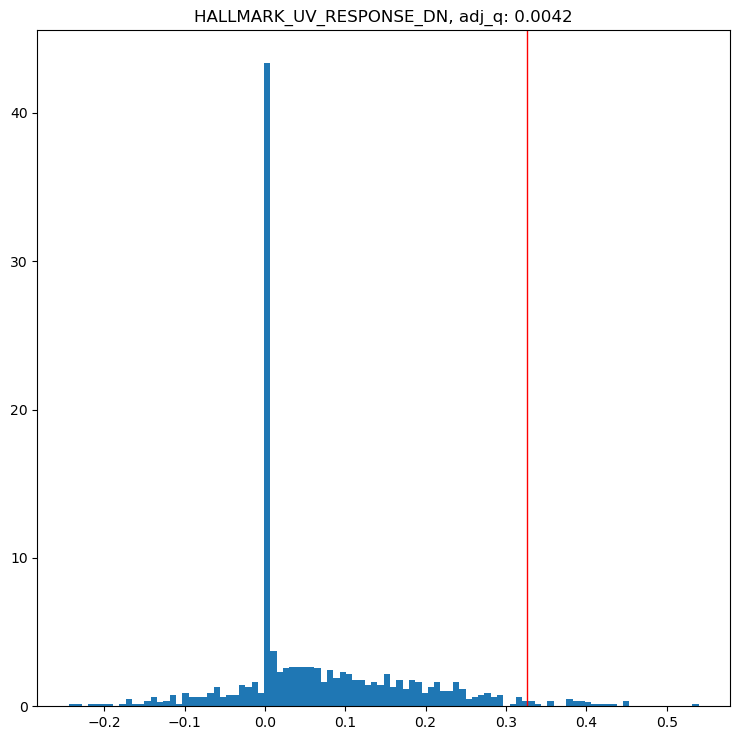

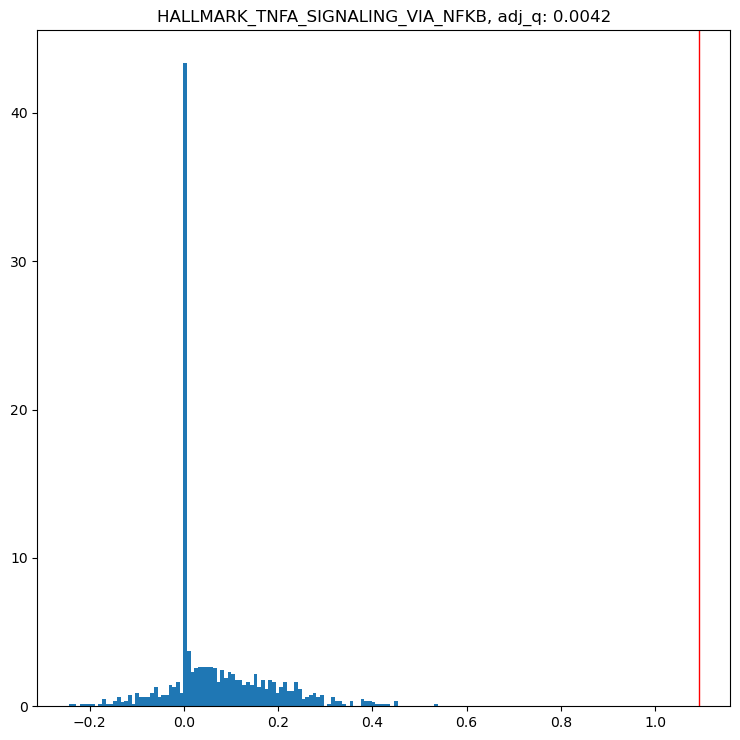

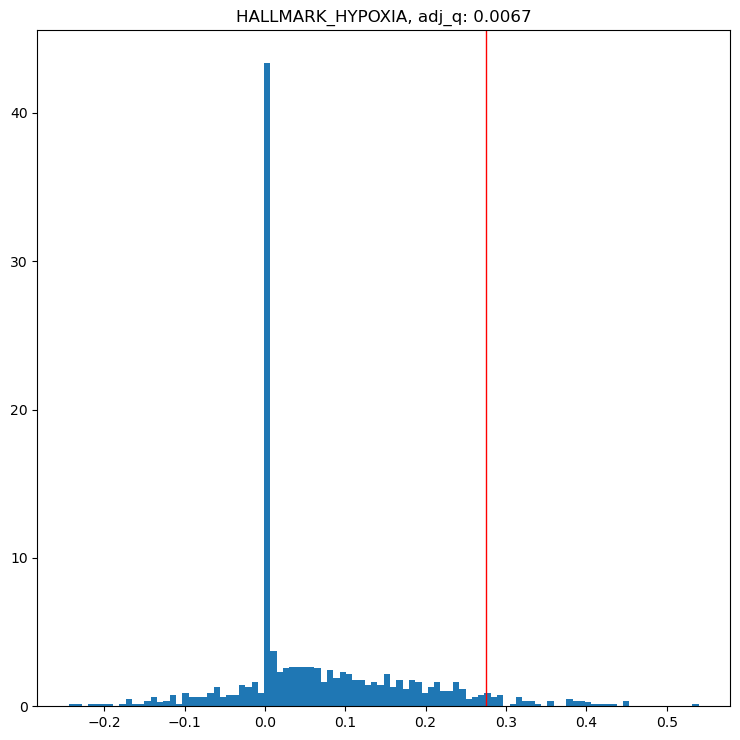

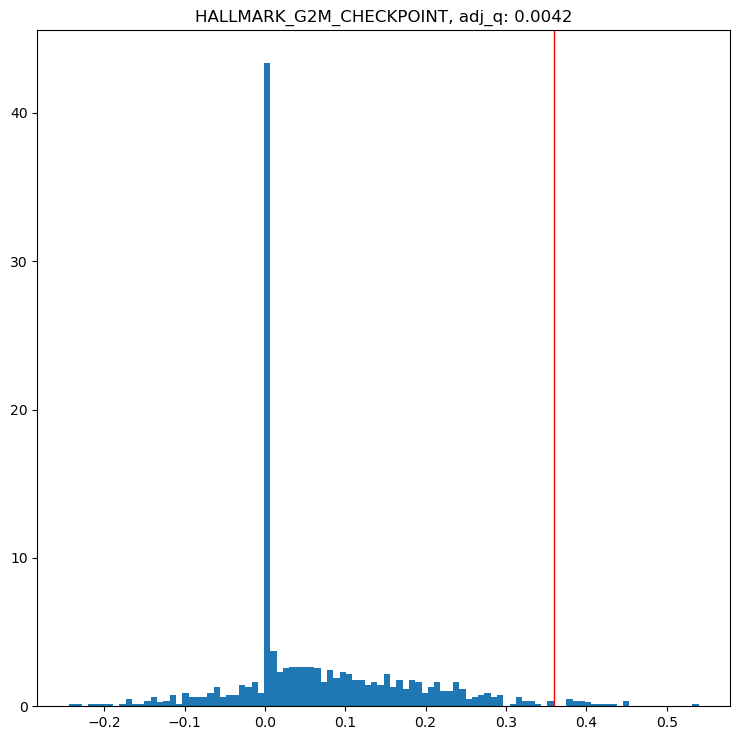

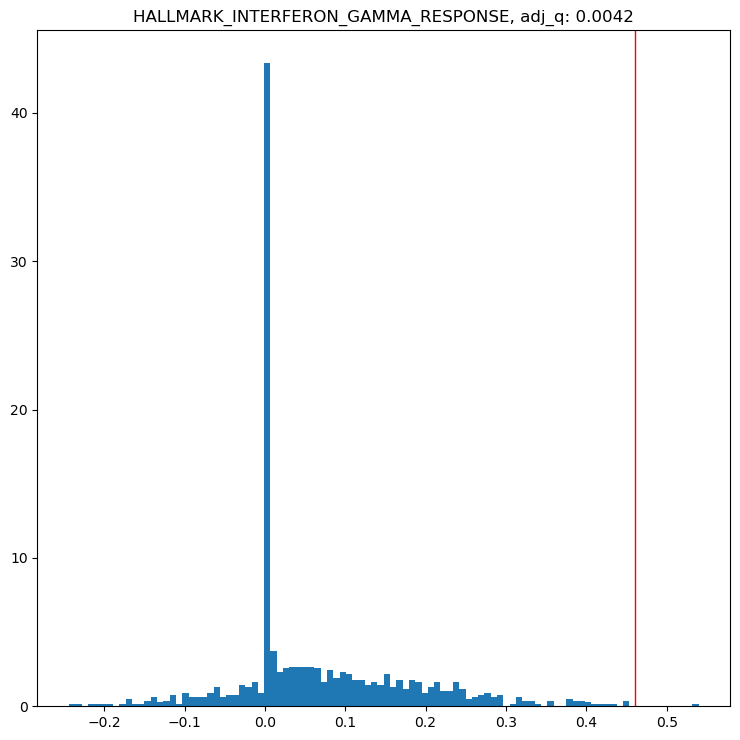

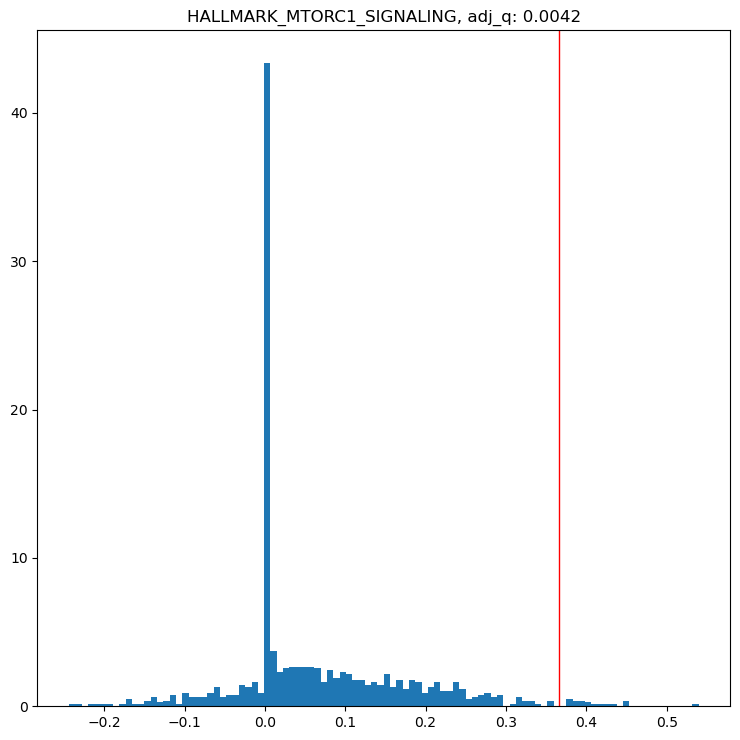

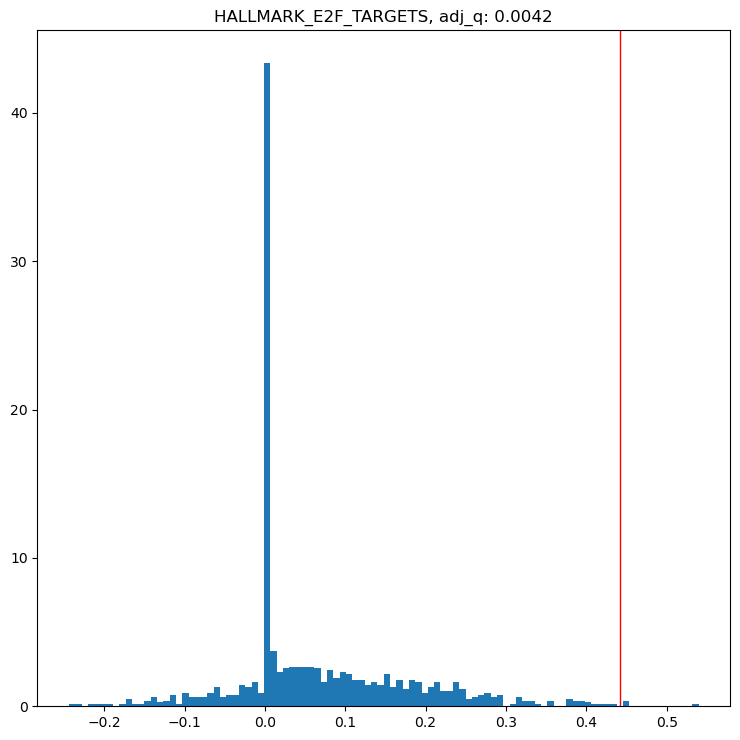

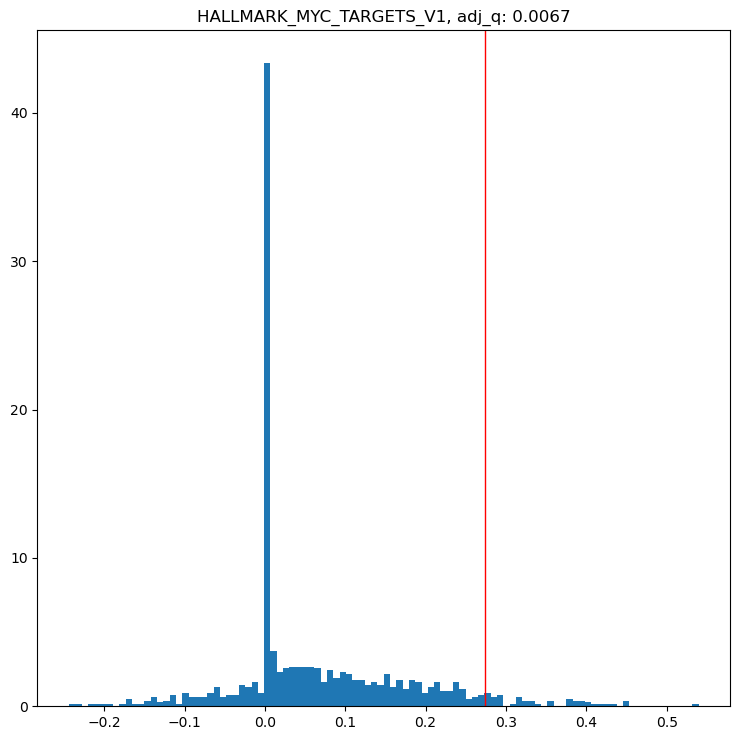

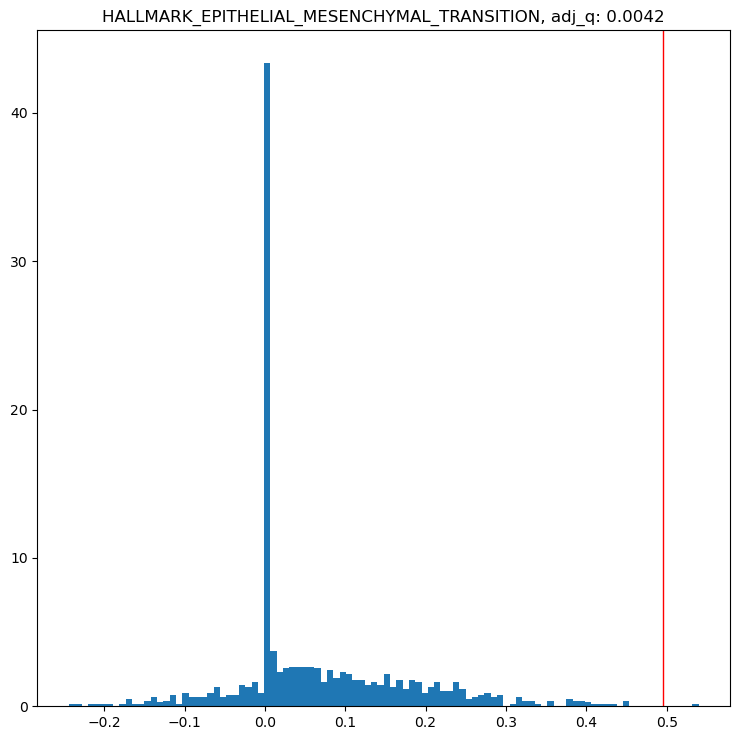

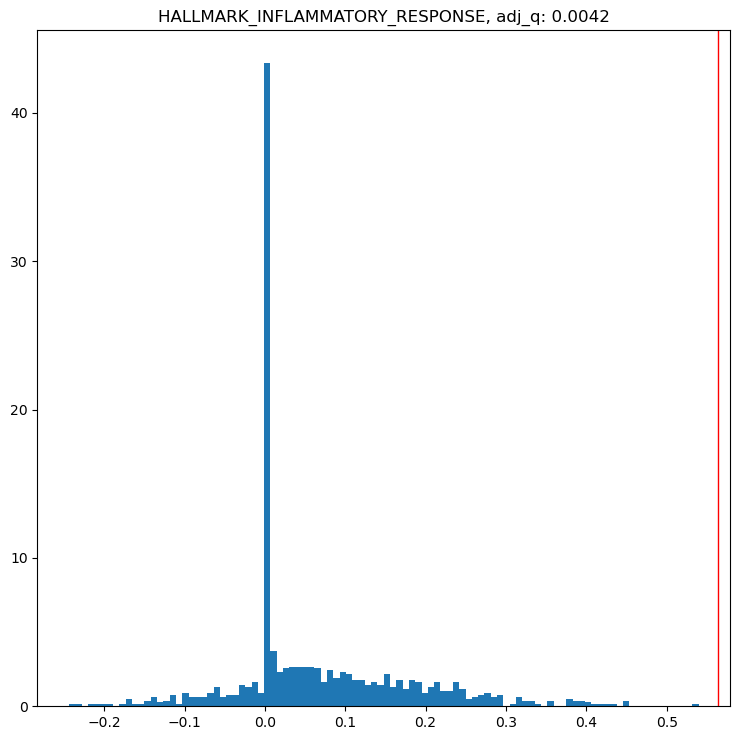

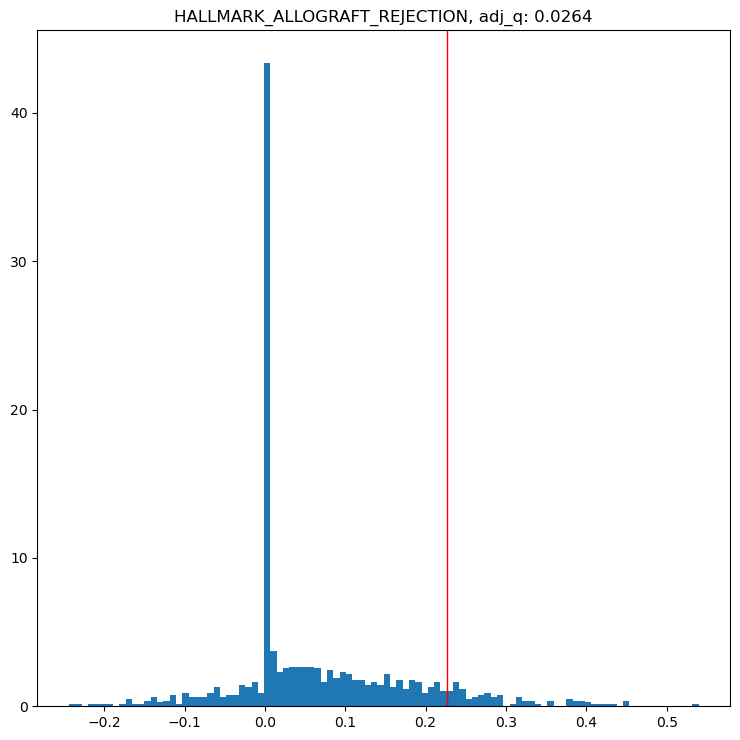

In [34]:
import matplotlib.pyplot as plt 

first = True
for name in roma.adata.uns['ROMA_active_modules'].index:

    fig, axs = plt.subplots(1, 1, figsize=(7.5, 7.5), tight_layout=True)
    if first:
        x = roma.adata.uns['ROMA'][name].null_median_exp
        first = False
    axs.hist(x, density=True, bins=100)
    axs.axvline(roma.adata.uns['ROMA'][name].test_median_exp, color='r', linewidth=1)
    q = roma.adata.uns['ROMA'][name].q_value
    axs.set_title(name + ', adj_q: ' + str(round(q, 4)))
    plt.show()



In [ ]:
roma.adata.obs = sample_labels
roma.adata.obs

,sample_id,Type,CF_sample_id
1,GSM5356205,non_CF,non_CF 1
2,GSM5356206,non_CF,non_CF 2
3,GSM5356207,non_CF,non_CF 3
4,GSM5356208,non_CF,non_CF 4
5,GSM5356209,non_CF,non_CF 5
6,GSM5356210,non_CF,non_CF 6
7,GSM5356217,CF,CF 1
8,GSM5356218,CF,CF 2
9,GSM5356219,CF,CF 3
10,GSM5356220,CF,CF 4
